In [4]:
import torch

<img src='assets/pytorch101_5.1.png' width='750'>

## Linear Regression

In [65]:
# data points: t_u  labels: t_c
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [66]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Linear approximation :
`t_c = w * t_u + b`

In [27]:
def model(t_u, w,b):
    return w*t_u+b

def loss_fn(t_c, t_p):
    sq = (t_p-t_c)**2
    return sq.mean()

In [14]:
# they will get broadcasted to the right shape
w = torch.ones(())
b = torch.zeros(())

In [15]:
t_p = model(t_u,w,b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [16]:
loss_fn(t_c, t_p)

tensor(1763.8848)

## Broadcasting
It uses the following rules to match tensor elements:
- For each index dimension, counted from the back, if one of the operands is size 1 in that dimension, PyTorch will use the single entry along this dimension with each of the entries in the other tensor along this dimension.
- If both sizes are greater than 1, they must be the same, and natural matching is used.
- If one of the tensors has more index dimensions than the other, the entirety of the other tensor will be used for each entry along these dimensions.


<img src='assets/pytorch101_5.2.png' width='750'>


## Gradient Descent
<img src='assets/pytorch101_5.3.png' width='750'>

In [28]:
def grads(t_u, t_c, t_p, w, b):
    # dl/dw = 2*(t_p - t_c) * t_p/dw = 2*(t_p - t_c)* (w*t_u+b)/dw = 2*(t_p - t_c) * t_u
    # dl_db = 2*(t_p - t_c) * t_p/db = 2*(t_p - t_c) * 1
    
    dloss_dw = (2*(t_p-t_c)/t_p.size(0)) * t_u
    dloss_db = (2*(t_p-t_c)/t_p.size(0)) * 1
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [19]:
help(torch.sum)

Help on built-in function sum:

sum(...)
    sum(input, *, dtype=None) -> Tensor
    
    Returns the sum of all elements in the :attr:`input` tensor.
    
    Args:
        input (Tensor): the input tensor.
    
    Keyword args:
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            If specified, the input tensor is casted to :attr:`dtype` before the operation
            is performed. This is useful for preventing data type overflows. Default: None.
    
    Example::
    
        >>> a = torch.randn(1, 3)
        >>> a
        tensor([[ 0.1133, -0.9567,  0.2958]])
        >>> torch.sum(a)
        tensor(-0.5475)
    
    .. function:: sum(input, dim, keepdim=False, *, dtype=None) -> Tensor
    
    Returns the sum of each row of the :attr:`input` tensor in the given
    dimension :attr:`dim`. If :attr:`dim` is a list of dimensions,
    reduce over all of them.
    
    
    If :attr:`keepdim` is ``True``, the output tensor is of the sa

In [54]:
def training_loop(epochs, lr, params, t_u, t_c):
    for i in range(1, epochs+1):
        w,b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grads(t_u, t_c, t_p, w, b)
        params = params - lr*grad
        if i%500 ==0:
            print('Epoch %d, Loss %f' % (i, float(loss)))
            print(params)
        
    return params

In [38]:
training_loop(10, 0.01, torch.tensor([1.0, 0.0]), t_u, t_c)

Epoch 1, Loss 1763.884766
tensor([-44.1730,  -0.8260])
Epoch 2, Loss 5802484.500000
tensor([2568.4011,   45.1637])
Epoch 3, Loss 19408029696.000000
tensor([-148527.7344,   -2616.3931])
Epoch 4, Loss 64915905708032.000000
tensor([8589999.0000,  151310.8906])
Epoch 5, Loss 217130525461053440.000000
tensor([-4.9680e+08, -8.7510e+06])
Epoch 6, Loss 726257583152928129024.000000
tensor([2.8732e+10, 5.0610e+08])
Epoch 7, Loss 2429183416467662896627712.000000
tensor([-1.6617e+12, -2.9270e+10])
Epoch 8, Loss 8125122549611731432050262016.000000
tensor([9.6102e+13, 1.6928e+12])
Epoch 9, Loss 27176882120842590626938030653440.000000
tensor([-5.5580e+15, -9.7903e+13])
Epoch 10, Loss 90901105189019073810297959556841472.000000
tensor([3.2144e+17, 5.6621e+15])


tensor([3.2144e+17, 5.6621e+15])

**Problems with a large learning rate**
<img src='assets/pytorch101_5.4.png' width='750'>

This can be taken care of by making the learning rate smaller

In [40]:
training_loop(100, 0.00001, torch.tensor([1.0, 0.0]), t_u, t_c)

Epoch 1, Loss 1763.884766
tensor([ 9.5483e-01, -8.2600e-04])
Epoch 2, Loss 1565.761353
tensor([ 0.9123, -0.0016])
Epoch 3, Loss 1390.265503
tensor([ 0.8723, -0.0023])
Epoch 4, Loss 1234.812378
tensor([ 0.8346, -0.0030])
Epoch 5, Loss 1097.112793
tensor([ 0.7992, -0.0037])
Epoch 6, Loss 975.139709
tensor([ 0.7658, -0.0043])
Epoch 7, Loss 867.096741
tensor([ 0.7344, -0.0049])
Epoch 8, Loss 771.393005
tensor([ 0.7049, -0.0054])
Epoch 9, Loss 686.619385
tensor([ 0.6771, -0.0060])
Epoch 10, Loss 611.527405
tensor([ 0.6509, -0.0065])
Epoch 11, Loss 545.011597
tensor([ 0.6263, -0.0069])
Epoch 12, Loss 486.092102
tensor([ 0.6031, -0.0074])
Epoch 13, Loss 433.901764
tensor([ 0.5813, -0.0078])
Epoch 14, Loss 387.671875
tensor([ 0.5607, -0.0082])
Epoch 15, Loss 346.721710
tensor([ 0.5414, -0.0085])
Epoch 16, Loss 310.448425
tensor([ 0.5232, -0.0089])
Epoch 17, Loss 278.317719
tensor([ 0.5061, -0.0092])
Epoch 18, Loss 249.856598
tensor([ 0.4900, -0.0095])
Epoch 19, Loss 224.645859
tensor([ 0.4748,

tensor([ 0.2340, -0.0165])

## Normalizing the data

On observation, its clear the w and b are very very different making uniform gradient flow not so great. A simple trick would be to normalize the inputs

In [67]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [42]:
max(t_u)

tensor(81.9000)

In [43]:
# t_u = t_u/max(t_u)

In [68]:
t_u = t_u * 0.1

In [70]:
t_u

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [71]:
params = training_loop(5000, 1e-2, torch.tensor([1.0, 0.0]), t_u, t_c)

Epoch 500, Loss 7.860115
tensor([ 4.0443, -9.8133])
Epoch 1000, Loss 3.828538
tensor([  4.8021, -14.1031])
Epoch 1500, Loss 3.092191
tensor([  5.1260, -15.9365])
Epoch 2000, Loss 2.957698
tensor([  5.2644, -16.7200])
Epoch 2500, Loss 2.933134
tensor([  5.3236, -17.0549])
Epoch 3000, Loss 2.928648
tensor([  5.3489, -17.1980])
Epoch 3500, Loss 2.927830
tensor([  5.3597, -17.2591])
Epoch 4000, Loss 2.927680
tensor([  5.3643, -17.2853])
Epoch 4500, Loss 2.927651
tensor([  5.3662, -17.2964])
Epoch 5000, Loss 2.927648
tensor([  5.3671, -17.3012])


## Visualizations

In [72]:
params

tensor([  5.3671, -17.3012])

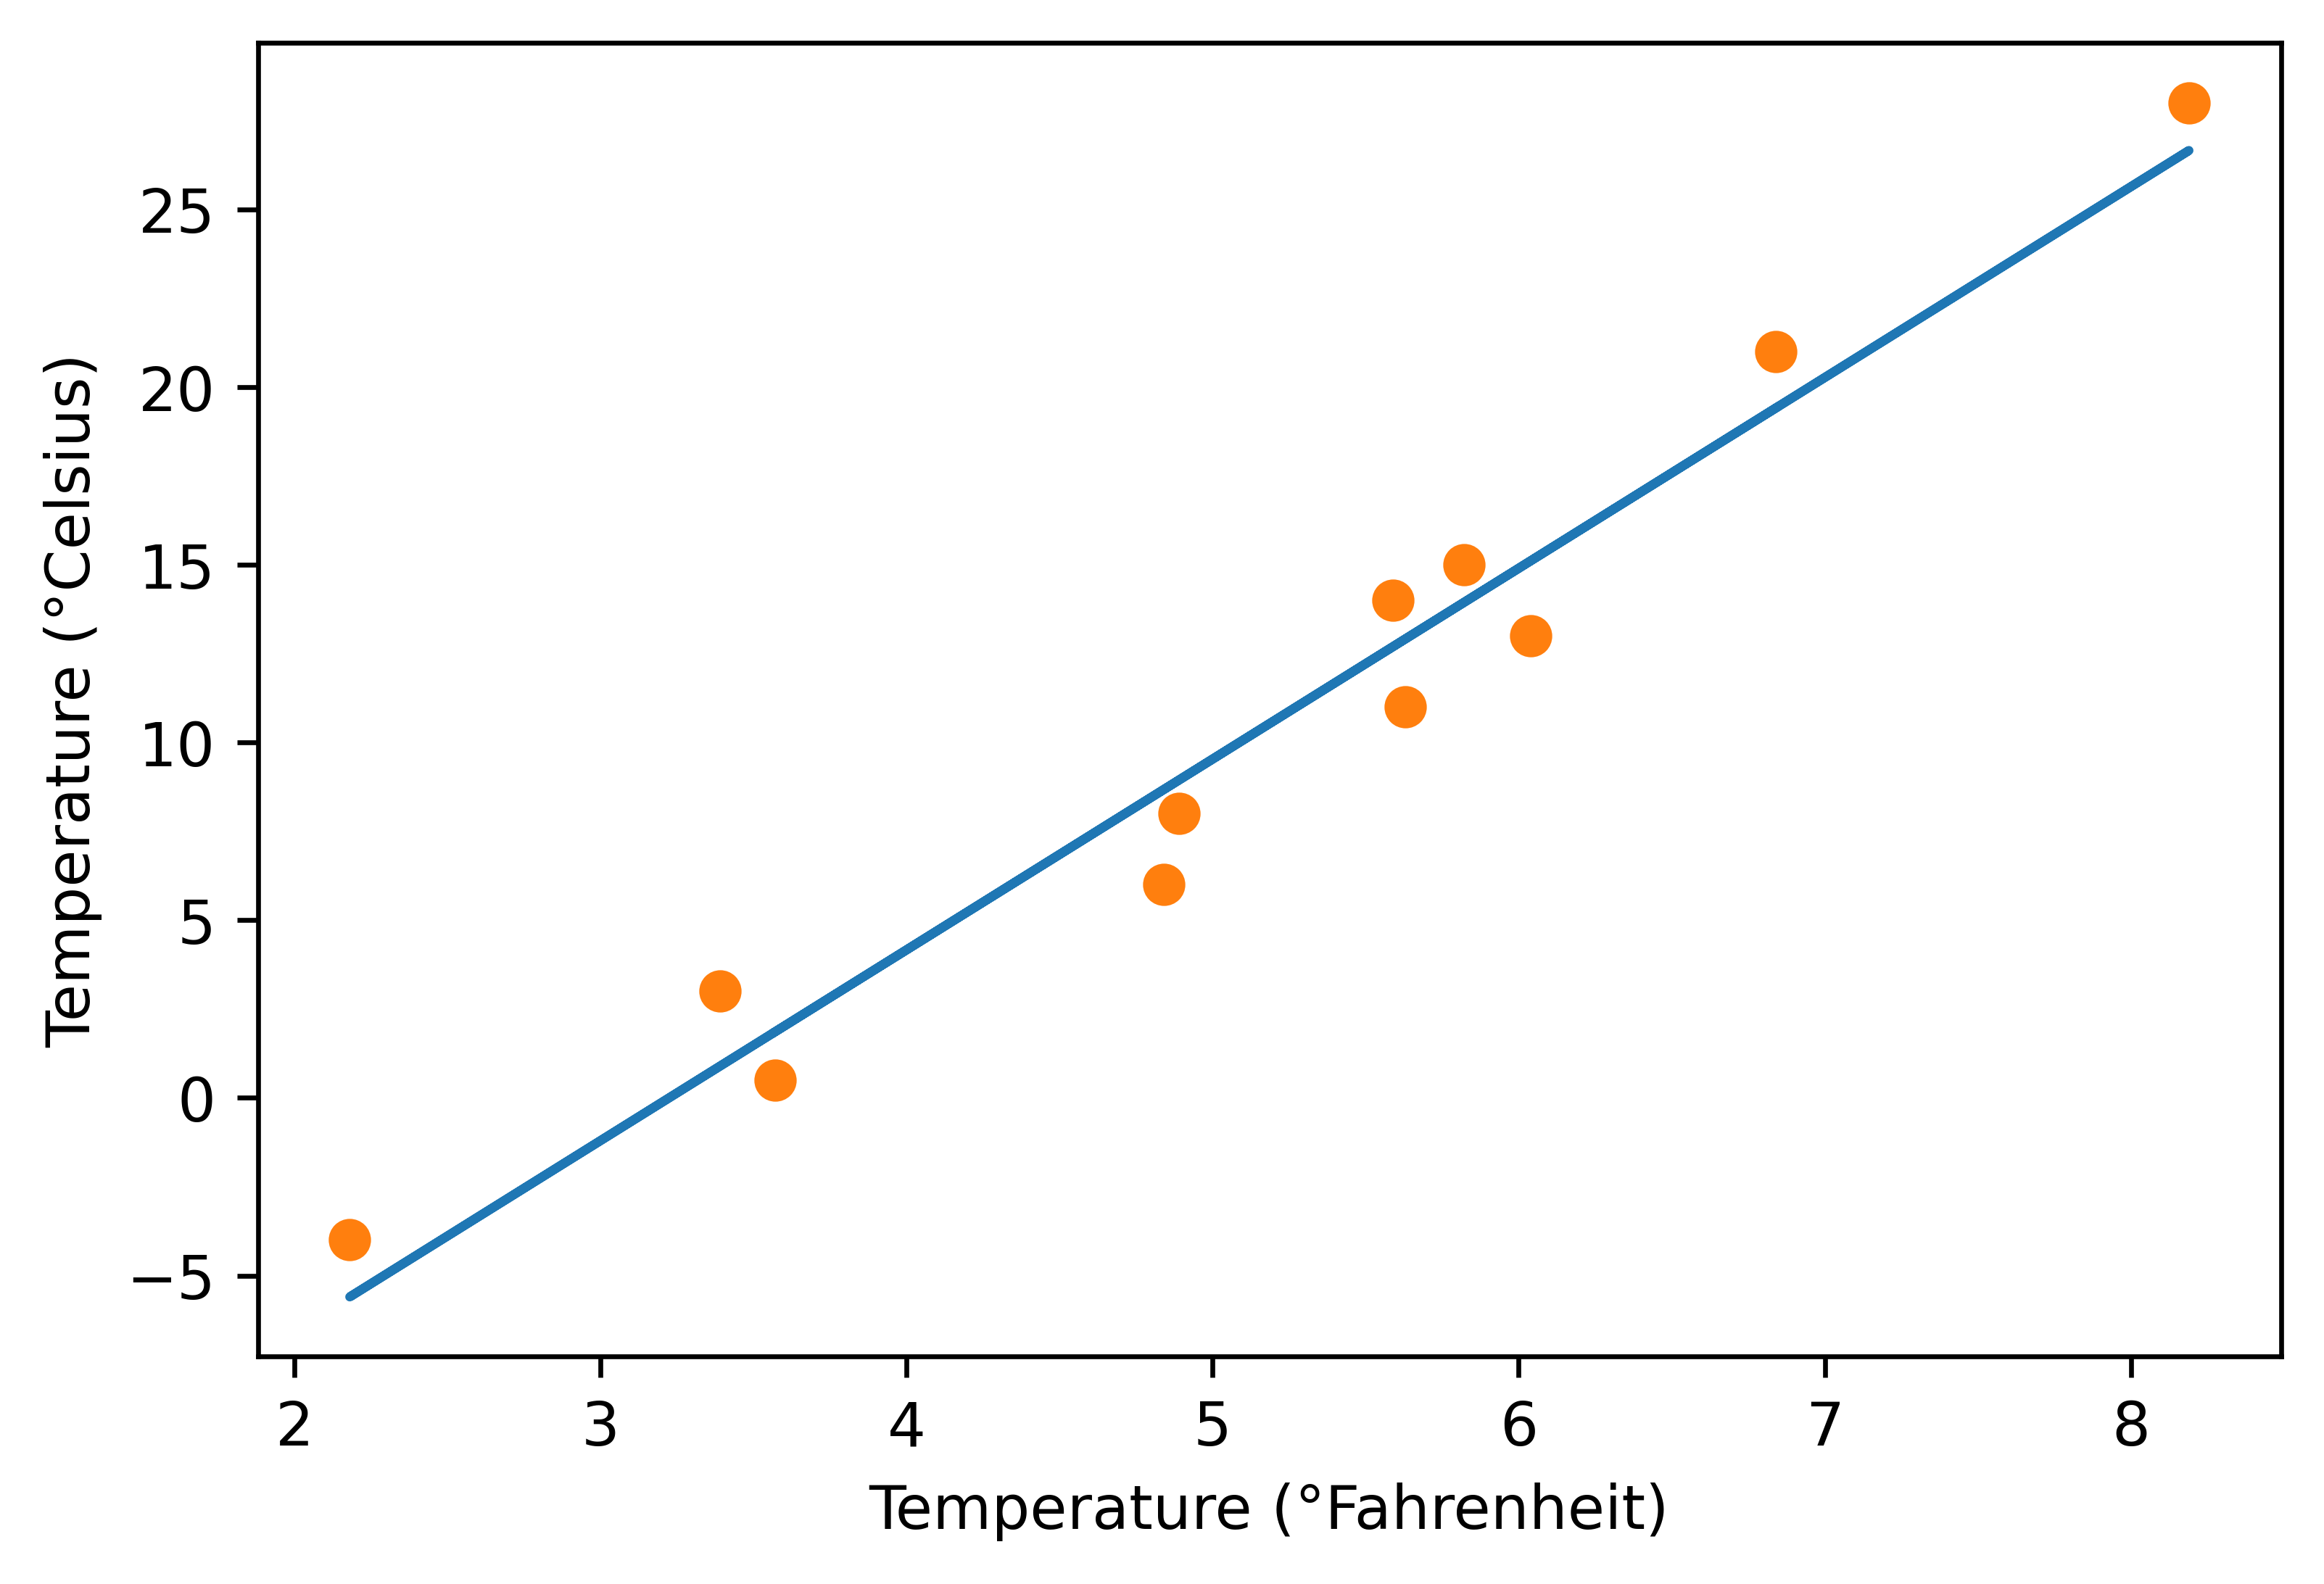

In [73]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_u, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

*params means to pass the elements of params as individual arguments. In Python, this is usually done with lists or tuples, but we can also use argument unpacking with PyTorch tensors, which are split along the leading dimension. So here, model(t_u, *params) is equivalent to model(t_un, params[0], params[1]).

## Pytorch Autograd
<img src='assets/pytorch101_5.5.png' width='750'>

In [75]:
params = torch.tensor([1.0 ,0.0], requires_grad=True)


In [76]:
loss = loss_fn(model(t_u, *params), t_c)

In [77]:
loss

tensor(80.3643, grad_fn=<MeanBackward0>)

In [78]:
loss.backward()

In [81]:
help(loss.backward)

Help on method backward in module torch._tensor:

backward(gradient=None, retain_graph=None, create_graph=False, inputs=None) method of torch.Tensor instance
    Computes the gradient of current tensor w.r.t. graph leaves.
    
    The graph is differentiated using the chain rule. If the tensor is
    non-scalar (i.e. its data has more than one element) and requires
    gradient, the function additionally requires specifying ``gradient``.
    It should be a tensor of matching type and location, that contains
    the gradient of the differentiated function w.r.t. ``self``.
    
    This function accumulates gradients in the leaves - you might need to zero
    ``.grad`` attributes or set them to ``None`` before calling it.
    See :ref:`Default gradient layouts<default-grad-layouts>`
    for details on the memory layout of accumulated gradients.
    
    .. note::
    
        If you run any forward ops, create ``gradient``, and/or call ``backward``
        in a user-specified CUDA strea

In [82]:
params.grad

tensor([-77.6140, -10.6400])

**NOTE: WARNING Calling backward will lead derivatives to accumulate at leaf nodes. We need to zero the gradient explicitly after using it for parameter updates.**

If we dont explicitly make the gradients zero they will keep getting summed up.

In [84]:
def training_loop(epochs, lr, params, t_u, t_c):
    for i in range(1, epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= lr*params.grad
        
        if i%500 == 0:
            print(f'Epoch: {i}, Loss: {loss}')
    return params

In [86]:
training_loop(5000, 1e-2, torch.tensor([1.0,0.0], requires_grad=True), t_u, t_c)

Epoch: 500, Loss: 7.860115051269531
Epoch: 1000, Loss: 3.828537940979004
Epoch: 1500, Loss: 3.092191219329834
Epoch: 2000, Loss: 2.957697868347168
Epoch: 2500, Loss: 2.933133840560913
Epoch: 3000, Loss: 2.9286484718322754
Epoch: 3500, Loss: 2.9278297424316406
Epoch: 4000, Loss: 2.9276793003082275
Epoch: 4500, Loss: 2.927651882171631
Epoch: 5000, Loss: 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

## OPTIMIZERS

So far we just used vanilaa gradient descent, now lets get into the differeent optimizers that are already a part of pytorch

In [87]:
import torch.optim as optim

In [88]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

### working flow for optimizers
<img src='assets/pytorch101_5.6.png' width='750'>


Eaach optimizer has the following two fucntions:
- zero_grad: zeros the grad attributes of all params
- step: updates the value of all params according to the defined strategy

In [89]:
# creating a gradient descent optim
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-5
optimizer = optim.SGD([params], lr)

In [90]:
help(optim.SGD)

Help on class SGD in module torch.optim.sgd:

class SGD(torch.optim.optimizer.Optimizer)
 |  SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)
 |  
 |  Implements stochastic gradient descent (optionally with momentum).
 |  
 |  Nesterov momentum is based on the formula from
 |  `On the importance of initialization and momentum in deep learning`__.
 |  
 |  Args:
 |      params (iterable): iterable of parameters to optimize or dicts defining
 |          parameter groups
 |      lr (float): learning rate
 |      momentum (float, optional): momentum factor (default: 0)
 |      weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
 |      dampening (float, optional): dampening for momentum (default: 0)
 |      nesterov (bool, optional): enables Nesterov momentum (default: False)
 |  
 |  Example:
 |      >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
 |      >>> optimizer.zero_grad()
 |      >>> loss_fn

In [91]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()

In [92]:
params

tensor([1.0008e+00, 1.0640e-04], requires_grad=True)

In [94]:
def training_loop(epochs, lr, optimizer, params, t_u, t_c):
    for i in range(1, epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p,t_c)
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        if i%500 == 0:
            print(f"Epochs: {i}, Loss: {loss}")
            
    return params

In [95]:
params = torch.tensor([1.0,0.0], requires_grad=True)
lr = 1e-2
optmizer = optim.SGD([params],lr)
training_loop(5000, lr, optmizer, params, t_u, t_c)

Epochs: 500, Loss: 7.860115051269531
Epochs: 1000, Loss: 3.828537940979004
Epochs: 1500, Loss: 3.092191219329834
Epochs: 2000, Loss: 2.957697868347168
Epochs: 2500, Loss: 2.933133840560913
Epochs: 3000, Loss: 2.9286484718322754
Epochs: 3500, Loss: 2.9278297424316406
Epochs: 4000, Loss: 2.9276793003082275
Epochs: 4500, Loss: 2.927651882171631
Epochs: 5000, Loss: 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

### Other Optimizers

In [96]:
optimizer = optim.Adam([params], lr)

In [97]:
training_loop(5000, lr, optmizer, params, t_u, t_c)

Epochs: 500, Loss: 2.9276466369628906
Epochs: 1000, Loss: 2.9276468753814697
Epochs: 1500, Loss: 2.927645206451416
Epochs: 2000, Loss: 2.927645206451416
Epochs: 2500, Loss: 2.927645206451416
Epochs: 3000, Loss: 2.927645206451416
Epochs: 3500, Loss: 2.927645206451416
Epochs: 4000, Loss: 2.927645206451416
Epochs: 4500, Loss: 2.927645206451416
Epochs: 5000, Loss: 2.927645206451416


tensor([  5.3676, -17.3042], requires_grad=True)

- rule 1: if the training loss is not decreasing, chances are the model is too simple for the data
- rule 2: if the training loss and the validation loss diverge, we’re overfitting.

## Data Splitting

In [99]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [101]:
shuffled_indices = torch.randperm(n_samples)

In [102]:
shuffled_indices

tensor([ 3,  1,  2,  9,  4,  8,  6, 10,  7,  0,  5])

In [103]:
help(torch.randperm)

Help on built-in function randperm:

randperm(...)
    randperm(n, *, generator=None, out=None, dtype=torch.int64,layout=torch.strided, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Returns a random permutation of integers from ``0`` to ``n - 1``.
    
    Args:
        n (int): the upper bound (exclusive)
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: ``torch.int64``.
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the current device for the default tensor type
            (see :func:`torch.set_default_tensor_type`). :at

In [104]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [105]:
train_indices, val_indices

(tensor([ 3,  1,  2,  9,  4,  8,  6, 10,  7]), tensor([0, 5]))

In [106]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [107]:
train_t_u

tensor([8.1900, 5.5900, 5.8200, 6.0400, 5.6300, 4.8400, 3.3900, 6.8400, 2.1800])

In [117]:
def training_loop(epochs, optimizwer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for i in range(1, epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        # backward only on train loss, as we want to only use train set for learning
        train_loss.backward()
        optimizer.step()
        
        if i<5 or i%500 ==0:
            print(f"Epochs: {i}, TrainLoss: {train_loss}, ValLoss: {val_loss}")
            
    return params

In [115]:
params = torch.tensor([1.0, 0.0], requires_grad=True) 
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [116]:
training_loop(3000, optimizer, params=params, train_t_u=train_t_u, val_t_u=val_t_u, train_t_c=train_t_c, val_t_c=val_t_c)

Epochs: 1, TrainLoss: 96.1011962890625, ValLoss: 9.548500061035156
Epochs: 2, TrainLoss: 35.651126861572266, ValLoss: 22.76980972290039
Epochs: 3, TrainLoss: 28.411394119262695, ValLoss: 35.22337341308594
Epochs: 4, TrainLoss: 27.479955673217773, ValLoss: 40.37754440307617
Epochs: 500, TrainLoss: 7.592894554138184, ValLoss: 13.721182823181152
Epochs: 1000, TrainLoss: 3.968079090118408, ValLoss: 6.107083797454834
Epochs: 1500, TrainLoss: 3.3146064281463623, ValLoss: 3.8030853271484375
Epochs: 2000, TrainLoss: 3.19680118560791, ValLoss: 2.992271661758423
Epochs: 2500, TrainLoss: 3.1755611896514893, ValLoss: 2.678205966949463
Epochs: 3000, TrainLoss: 3.17173171043396, ValLoss: 2.5503103733062744


tensor([  5.2345, -16.3226], requires_grad=True)

<img src='assets/pytorch101_5.7.png' width='750'>

<img src='assets/pytorch101_5.8.png' width='750'>
The only tensors these two graphs have in common are the parameters. When we call backward on train_loss, we run backward on the first graph. In other words, we accumulate the derivatives of train_loss with respect to the parameters based on the computation generated from train_t_u.

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()